In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import getdata
from SB import SB
import time

In [2]:
def SB_test(trial_num_test=1000, a0_test=1, c1_test=200, stepNum_test=100, deltaT_test=0.01, algorithm_test="bSB", beta_test=0.18):
    average_time = 0
    result = []
    
    for tt in range(trial_num):
        start = time.time()
        _, cutSize = SB(J, vertex, a0=a0_test, c1=c1_test, stepNum=stepNum_test, deltaT=deltaT_test, algorithm=algorithm_test, beta=beta_test)
        duration = time.time() - start
        average_time = ((tt)*average_time + duration) / (tt + 1)
        result.append(cutSize)
    return average_time, result

In [174]:
def param_test(trial_num, param_type=None, param_data=np.array([])):
    """
    测试函数，返回测试结果和时间
    """
    cutSize_for_all_param = np.zeros((param_data.shape[0], trial_num))
    average_time_for_all_param = np.zeros(param_data.shape[0])  #  防止参数会影响迭代时间
    if param_type==None:
        return SB_test(trial_num_test=trial_num)
        
    for i,param in enumerate(param_data):
        result = np.zeros(trial_num)
        average_time  = 0 # averge time of each trial
    
        for tt in range(trial_num):
            
            if param_type=='c1':
                start = time.time()
                _, cutSize = SB(J, vertex, c1=param)
                duration = time.time() - start
                average_time = ((tt)*average_time + duration) / (tt + 1)
                result[tt] = cutSize 
                
            else:
                start = time.time()
                _, cutSize = SB(J, vertex)
                duration = time.time() - start
                average_time = ((tt)*average_time + duration) / (tt + 1)
                result[tt] = cutSize 
                
            
        average_time_for_all_param[i] = average_time
        cutSize_for_all_param[i, 0:trial_num] = result

    return average_time_for_all_param, cutSize_for_all_param

In [3]:
J, vertex = getdata("G05.csv")

# 调试参数C1
$c0 = {c1 \over \sqrt{N}}$

In [92]:
c1 = np.array(range(0, 1000, 10))
delta_T = 0.01
trial_num = 1000

In [94]:
c1.shape[0]

100

In [95]:
cutSize_for_all_c1 = np.zeros((c1.shape[0], trial_num))
average_time_for_all_c1 = np.zeros(c1.shape[0])  #  防止参数会影响迭代时间
for i,C1 in enumerate(c1):
    result = np.zeros(trial_num)
    average_time  = 0 # averge time of each trial
    
    for tt in range(trial_num):
        start = time.time()
        _, cutSize = SB(J, vertex, c1=C1, deltaT=0.01)
        duration = time.time() - start
        average_time = ((tt)*average_time + duration) / (tt + 1)
        result[tt] = cutSize 
    average_time_for_all_c1[i] = average_time
    cutSize_for_all_c1[i, 0:trial_num] = result
    

In [96]:
cutSize_for_all_c1

array([[3., 2., 4., ..., 2., 3., 3.],
       [5., 4., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 4.],
       [5., 4., 5., ..., 4., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

In [97]:
average_time_for_all_c1

array([0.00213156, 0.00236609, 0.00379601, 0.00437182, 0.00452875,
       0.0042293 , 0.00345793, 0.00389485, 0.00312322, 0.00219547,
       0.00187547, 0.00187887, 0.00181125, 0.00189414, 0.00178462,
       0.00187438, 0.00188019, 0.00187495, 0.00193907, 0.00199253,
       0.00182425, 0.00187617, 0.00171875, 0.00198794, 0.00177707,
       0.00188048, 0.001875  , 0.00187501, 0.00171875, 0.00194375,
       0.00177888, 0.00188085, 0.0018762 , 0.00187456, 0.00180746,
       0.00193551, 0.00171969, 0.00188134, 0.00186982, 0.00187453,
       0.00181397, 0.00193516, 0.00187543, 0.00187616, 0.00171875,
       0.00196922, 0.00198709, 0.0019873 , 0.00187649, 0.00187499,
       0.0024294 , 0.00177912, 0.00266099, 0.00218887, 0.00203125,
       0.00236101, 0.00203298, 0.00171833, 0.00187522, 0.00187498,
       0.00179246, 0.00194014, 0.00187553, 0.00172324, 0.00187503,
       0.00180506, 0.00193468, 0.00188083, 0.00171934, 0.00187551,
       0.00187455, 0.00193233, 0.00180848, 0.0018799 , 0.00188

In [100]:
def evaluate_max_cut(result, target_value, tuo, method='TTS'):
    RTS_result = [] #存储每一组数据的TTS结果
    P_result = []
    for array in result:
        P = len(array[array==target_value]) / len(array)
        P_result.append(P)
        RTS = np.log(0.01) / np.log(1-P)
        RTS_result.append(RTS)

    RTS_result = np.array(RTS_result)
    TTS_result = np.dot(RTS_result, tuo)

    # TODO 
    # 用户可选使用哪种指标

    return RTS_result, P_result
    
    

In [101]:
_, P = evaluate_max_cut(cutSize_for_all_c1, target_value=5, tuo=average_time_for_all_c1)

Text(0, 0.5, 'Average trial time')

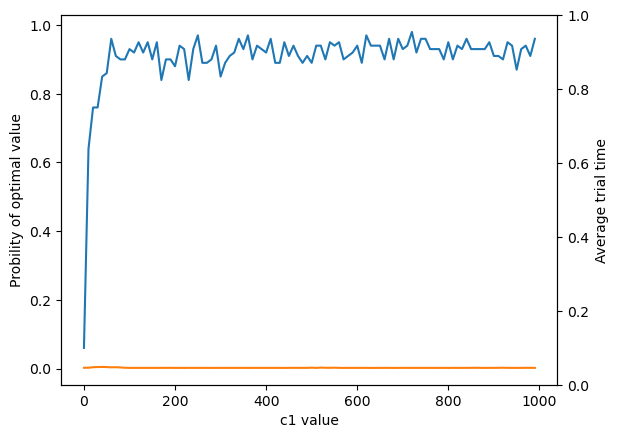

In [116]:
fig, ax = plt.subplots()
ax.plot(c1, P)
ax.plot(c1, average_time_for_all_c1)
ax.set_xlabel("c1 value")
ax.set_ylabel("Probility of optimal value")
ax2 = ax.twinx()
ax2.set_ylabel('Average trial time')

# 结论
在一定范围内，c1取值越大，则获得最优值的概率越高，达到一定程度之后，得到最优值的概率在一定范围内波动

## 接下来缩小测试区间

In [134]:
trial_time, result = test(trial_num=1000, param_type='c1', param_data=np.array(range(0,100, 1)))

In [135]:
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)

Text(0, 0.5, 'Average trial time')

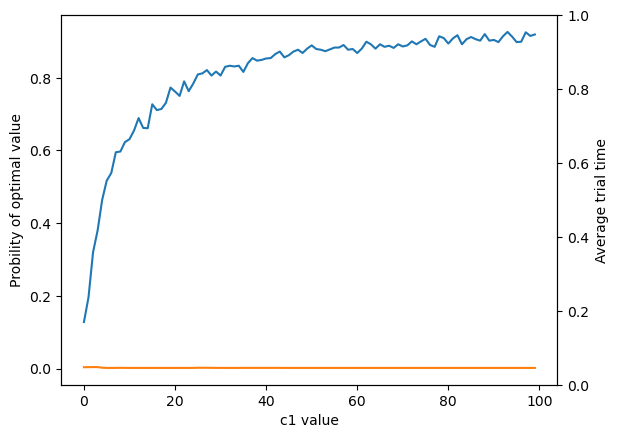

In [139]:
fig, ax = plt.subplots()
ax.plot(range(0,100, 1), P)
ax.plot(range(0,100, 1), trial_time)
ax.set_xlabel("c1 value")
ax.set_ylabel("Probility of optimal value")
ax2 = ax.twinx()
ax2.set_ylabel('Average trial time')

## 接下来探索初始化对于结果的影响
1. 随机初始化下x,y
2. x设为0， y随机初始化

随机初始化分为两种：

[1] 随机初始化为1，-1

[2] 随机初始化为（-1，1）范围内的实数

In [147]:
np.random.rand(5)*2 - 1

array([-0.46703159, -0.50602756, -0.87423766,  0.02812865,  0.36535124])

# 1. x设为0 y随机初始化为(-1,1)范围内的实数

In [175]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])

In [176]:
for array in result:
    print(array)

[5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 4. 4. 5. 5. 5.
 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5.]


In [177]:
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)

In [178]:
P

[0.9]

# 2. x, y随机初始化为(-1,1)范围内的实数

In [179]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
P

[0.92]

# 3. x, y随机初始化为1 -1

In [180]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
P

[0.88]

# 4. x=0, y随机初始化为1 -1

In [181]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
P

[0.9]

# 5. 随机初始化x,y, 不设置范围

In [182]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
P

[0.92]

# 6. x=0， 随机初始化y, 不设置范围

In [183]:
trial_time, cutSize = param_test(trial_num=1000)
result = np.array([cutSize])
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
P

[0.94]

# 接下来调试beta的参数

In [190]:
beta = np.array(range(0,50,1))/10

In [191]:
beta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [192]:
trial_time = []
cutSize = []
for b in beta:
    t, c = SB_test(trial_num_test=1000, a0_test=1, c1_test=200, stepNum_test=100, deltaT_test=0.01, algorithm_test="bSB", beta_test=b)
    trial_time.append(t)
    cutSize.append(c)
    

In [194]:
result = np.array(cutSize)
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)


Text(0, 0.5, 'Average trial time')

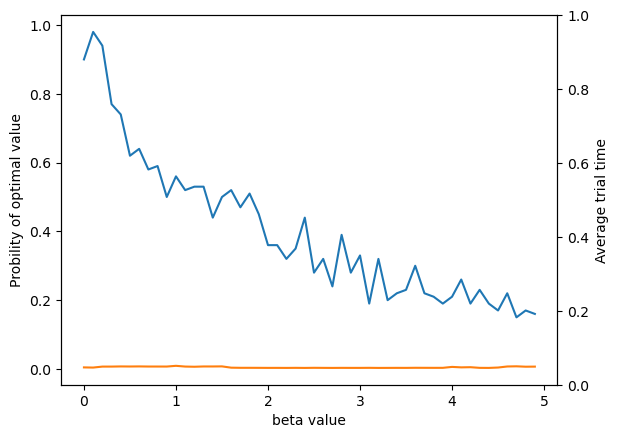

In [195]:
fig, ax = plt.subplots()
ax.plot(beta, P)
ax.plot(beta, trial_time)
ax.set_xlabel("beta value")
ax.set_ylabel("Probility of optimal value")
ax2 = ax.twinx()
ax2.set_ylabel('Average trial time')

# 结果显示beta=0.1时有最优值
接下来缩小范围

In [199]:
beta = np.array(range(0,50,1))/100
beta

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

[0.91, 0.96, 0.93, 0.96, 0.91, 0.96, 0.96, 0.94, 0.98, 0.94, 0.97, 0.98, 0.99, 0.98, 0.96, 0.98, 0.98, 0.98, 1.0, 0.98, 0.94, 0.94, 0.91, 0.83, 0.92, 0.84, 0.87, 0.92, 0.83, 0.78, 0.89, 0.74, 0.76, 0.75, 0.85, 0.77, 0.65, 0.75, 0.73, 0.75, 0.59, 0.69, 0.79, 0.62, 0.72, 0.66, 0.64, 0.61, 0.62, 0.62]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_34988\4147664702.py:7: RuntimeWarning: divide by zero encountered in log
  RTS = np.log(0.01) / np.log(1-P)


Text(0, 0.5, 'Average trial time')

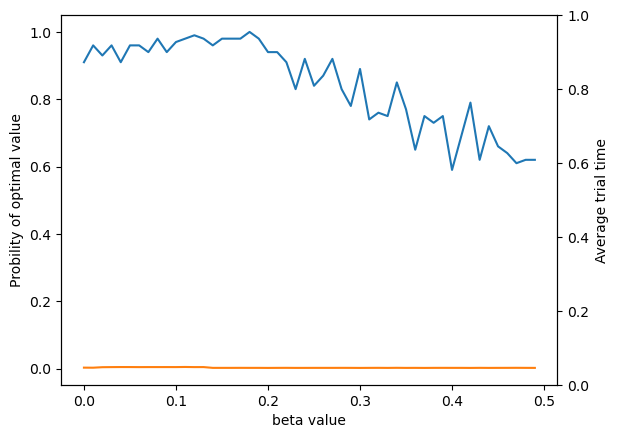

In [200]:
trial_time = []
cutSize = []
for b in beta:
    t, c = SB_test(trial_num_test=1000, a0_test=1, c1_test=200, stepNum_test=100, deltaT_test=0.01, algorithm_test="bSB", beta_test=b)
    trial_time.append(t)
    cutSize.append(c)
    
result = np.array(cutSize)
_, P = evaluate_max_cut(result, target_value=5, tuo=trial_time)
print(P)
fig, ax = plt.subplots()
ax.plot(beta, P)
ax.plot(beta, trial_time)
ax.set_xlabel("beta value")
ax.set_ylabel("Probility of optimal value")
ax2 = ax.twinx()
ax2.set_ylabel('Average trial time')

# 结果表明在0.15左右，效果最优， 0.18测试集效果最好

In [213]:
J, vertex = getdata("G1.csv")

In [218]:
cutSize = []
for i in range(20):
    _, c = SB(J, vertex, c1=300, beta=0.18)
    cutSize.append(c)

In [219]:
cutSize

[11079.0,
 7579.0,
 10913.0,
 9539.0,
 11281.0,
 8719.0,
 10364.0,
 11225.0,
 9128.0,
 11221.0,
 11173.0,
 10790.0,
 11224.0,
 5692.0,
 10996.0,
 10849.0,
 11087.0,
 10904.0,
 11202.0,
 10423.0]

In [22]:
J, vertex = getdata("G1.csv")
cutSize = []
for i in range(20):
    _, c = SB(J, vertex, c1=300, beta=0.18, algorithm='dSB')
    cutSize.append(c)

In [23]:
cutSize

[11217.0,
 11194.0,
 10889.0,
 11237.0,
 10638.0,
 11118.0,
 11151.0,
 10048.0,
 11137.0,
 11204.0,
 11185.0,
 10791.0,
 10735.0,
 11181.0,
 11162.0,
 10996.0,
 11166.0,
 11196.0,
 11091.0,
 11025.0]